Populating the interactive namespace from numpy and matplotlib


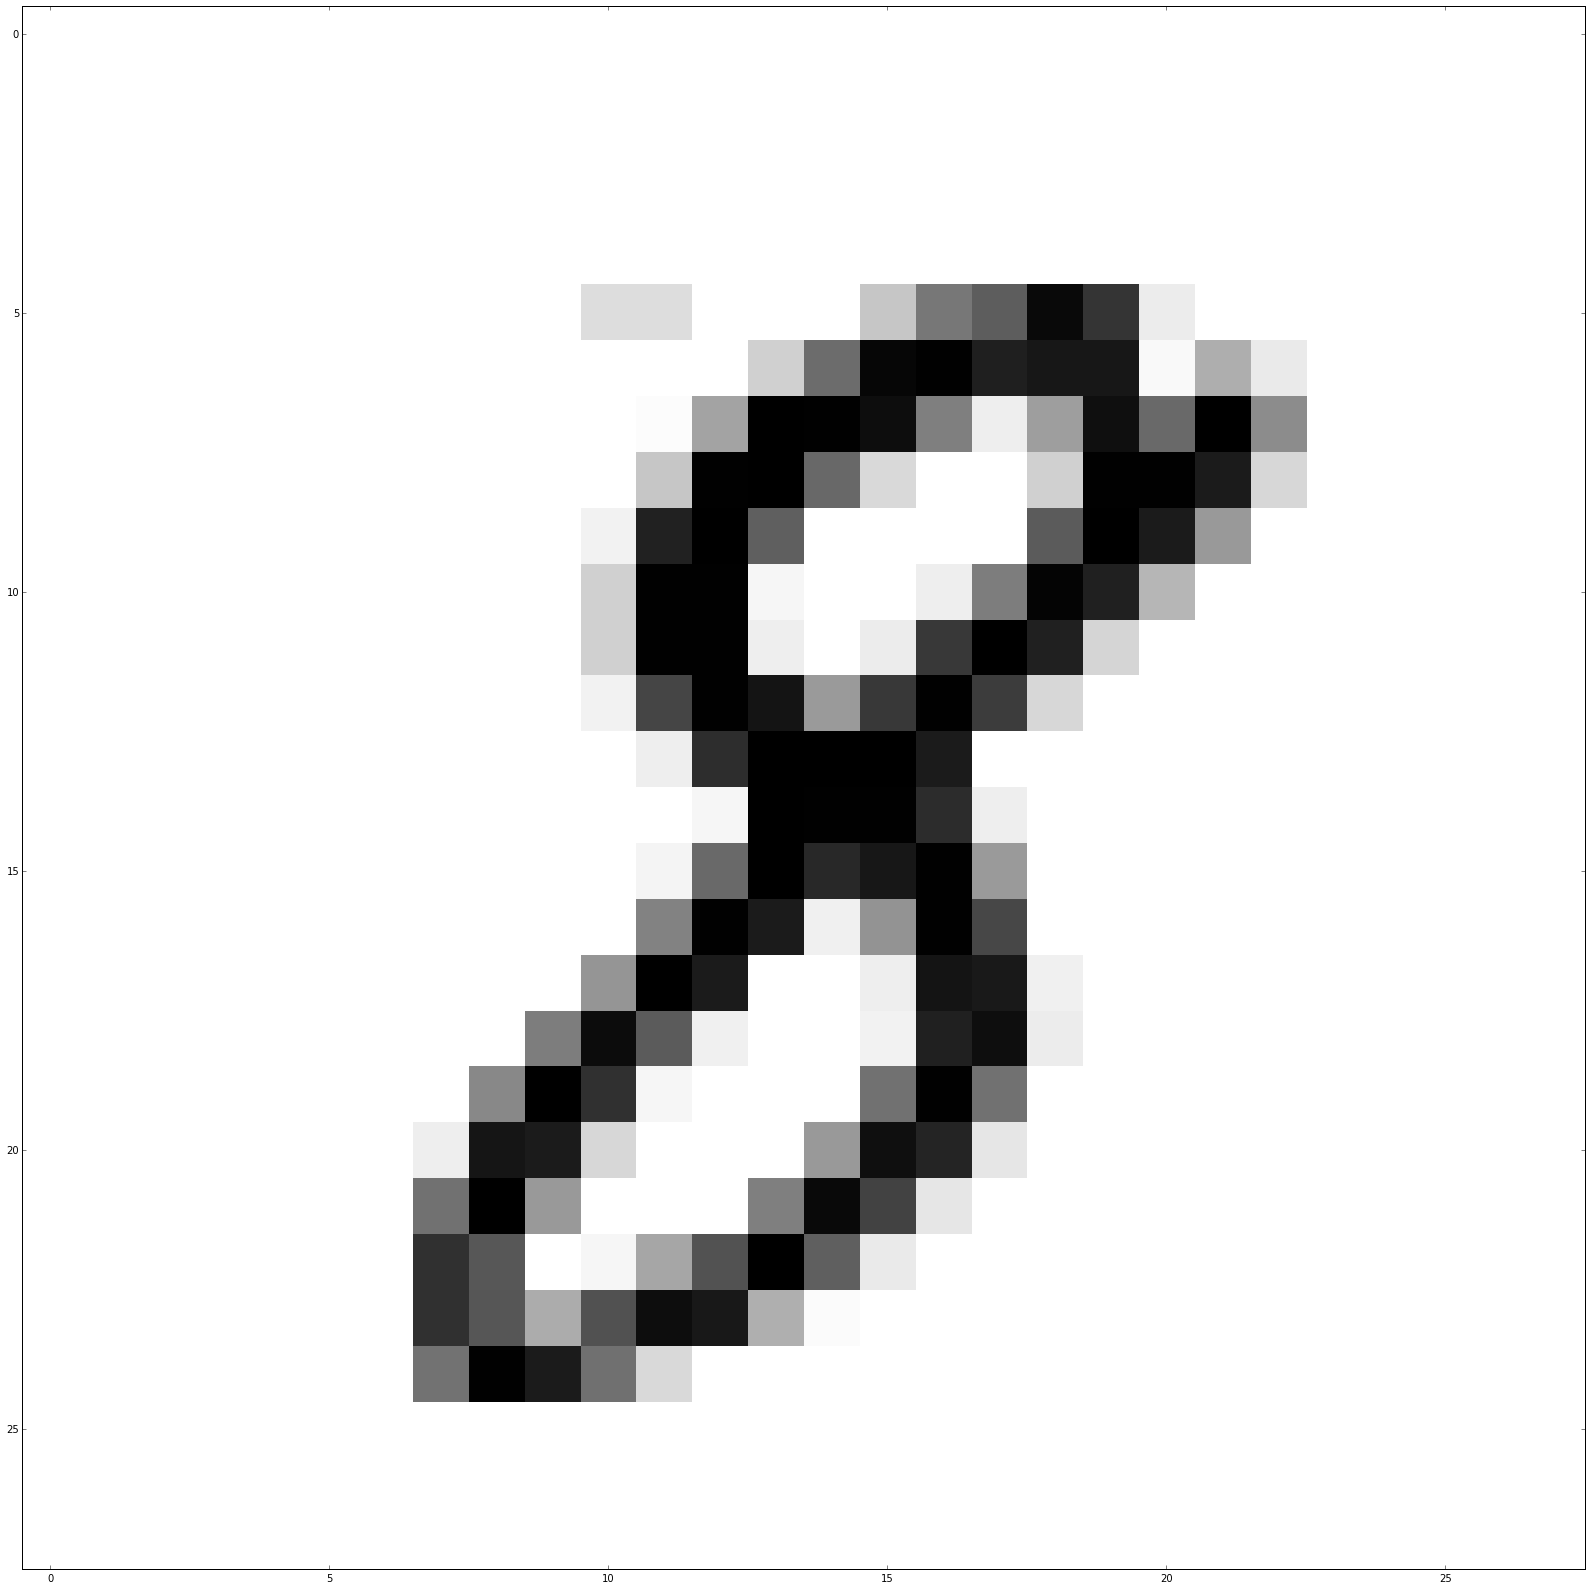

In [3]:
%pylab inline
import rlcompleter, readline
readline.parse_and_bind('tab: complete')
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from sets import Set

dataset = np.genfromtxt("Desktop/MordernAnalytics/assignment1/train.csv",delimiter=",")[1:]
label = [row[0] for row in dataset]
train = np.asarray([row[1:] for row in dataset])
target = Set(label)

def display_img(list):
    img_1 = reshape(list,(28,28))
    plt.figure(1,figsize(28,28))
    plt.imshow(img_1,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.show()
    plt.close()
def digit_count():
    l=[]
    for x in target:
        l.append(label.count(x))
    return l
def prior_prob():
    pp=[]
    l=digit_count()
    s=sum(l)
    for each in l:
        pp.append(each/s)
    return pp
pp=prior_prob()
display_img(train[20])

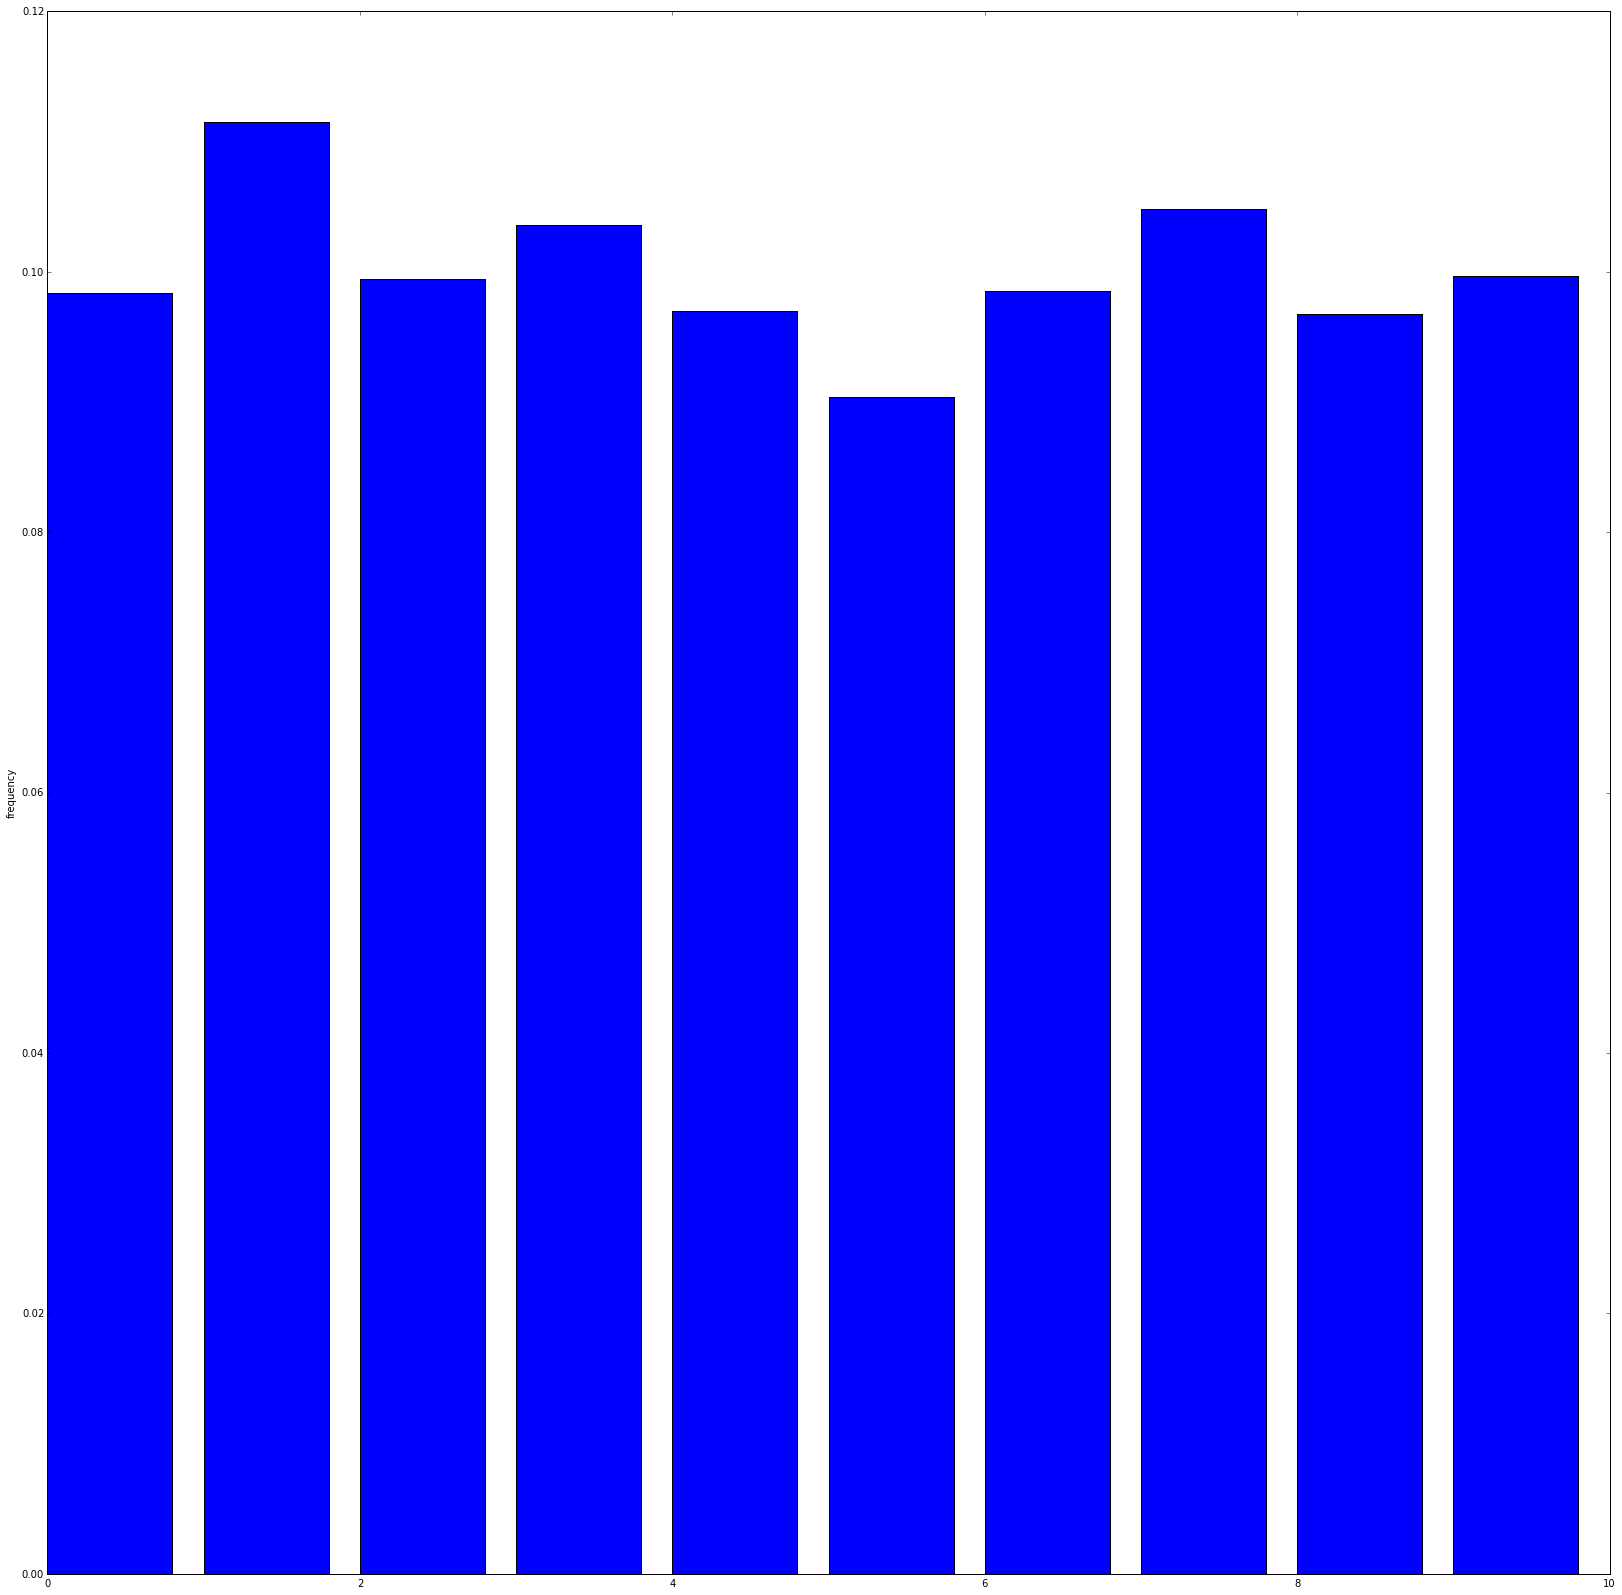

In [5]:
plt.bar(target,pp,width=0.8)
plt.ylabel('frequency')

In [4]:
from sklearn.metrics.pairwise import euclidean_distances
indices = [0,1,3,6,7,8,10,11,16,21]
samples=np.take(label,indices)
def best_match(index):
    nbs=[]
    for i in index:
        b_train=np.delete(train,i,0)
        b_label=np.delete(label,i,0)
        ds=euclidean_distances(train[i],b_train)
        nbs.append(b_label[np.argmin(ds)])
    return nbs
print(samples)
best_match(indices)

[ 1.  0.  4.  7.  3.  5.  8.  9.  2.  6.]


[1.0, 0.0, 4.0, 7.0, 5.0, 5.0, 8.0, 9.0, 2.0, 6.0]

In [ ]:
train_0 = []
train_1 = []
for i in range(0,len(label)):
    if(label[i] == 0.0):
        train_0.append(train[i])
    if(label[i] == 1.0):
        train_1.append(train[i])    
g_ds = []
i_ds = []
def match(t0,t1):
    for i in range(0,len(t0)):
        tmp = np.delete(t0,i,0)
        for k in range(0,tmp.shape[0]):
            ds = euclidean_distances(t0[i],tmp[k])
            g_ds.append(ds)
        for s in range(0,len(t1)):
            ds = euclidean_distances(t0[i],t1[s])
            i_ds.append(ds)
    for i in range(0,len(t1)):
        tmp = np.delete(t1,i,0)
        for k in range(0,tmp.shape[0]):
            ds = euclidean_distances(t1[i],tmp[k])
            g_ds.append(ds)
        for s in range(0,len(t0)):
            ds = euclidean_distances(t1[i],t0[s])
            i_ds.append(ds)
match(train_0,train_1)
genuine = np.asarray(g_ds).flatten()
imposter = np.asarray(i_ds).flatten()
m=max(np.append(genuine,imposter))


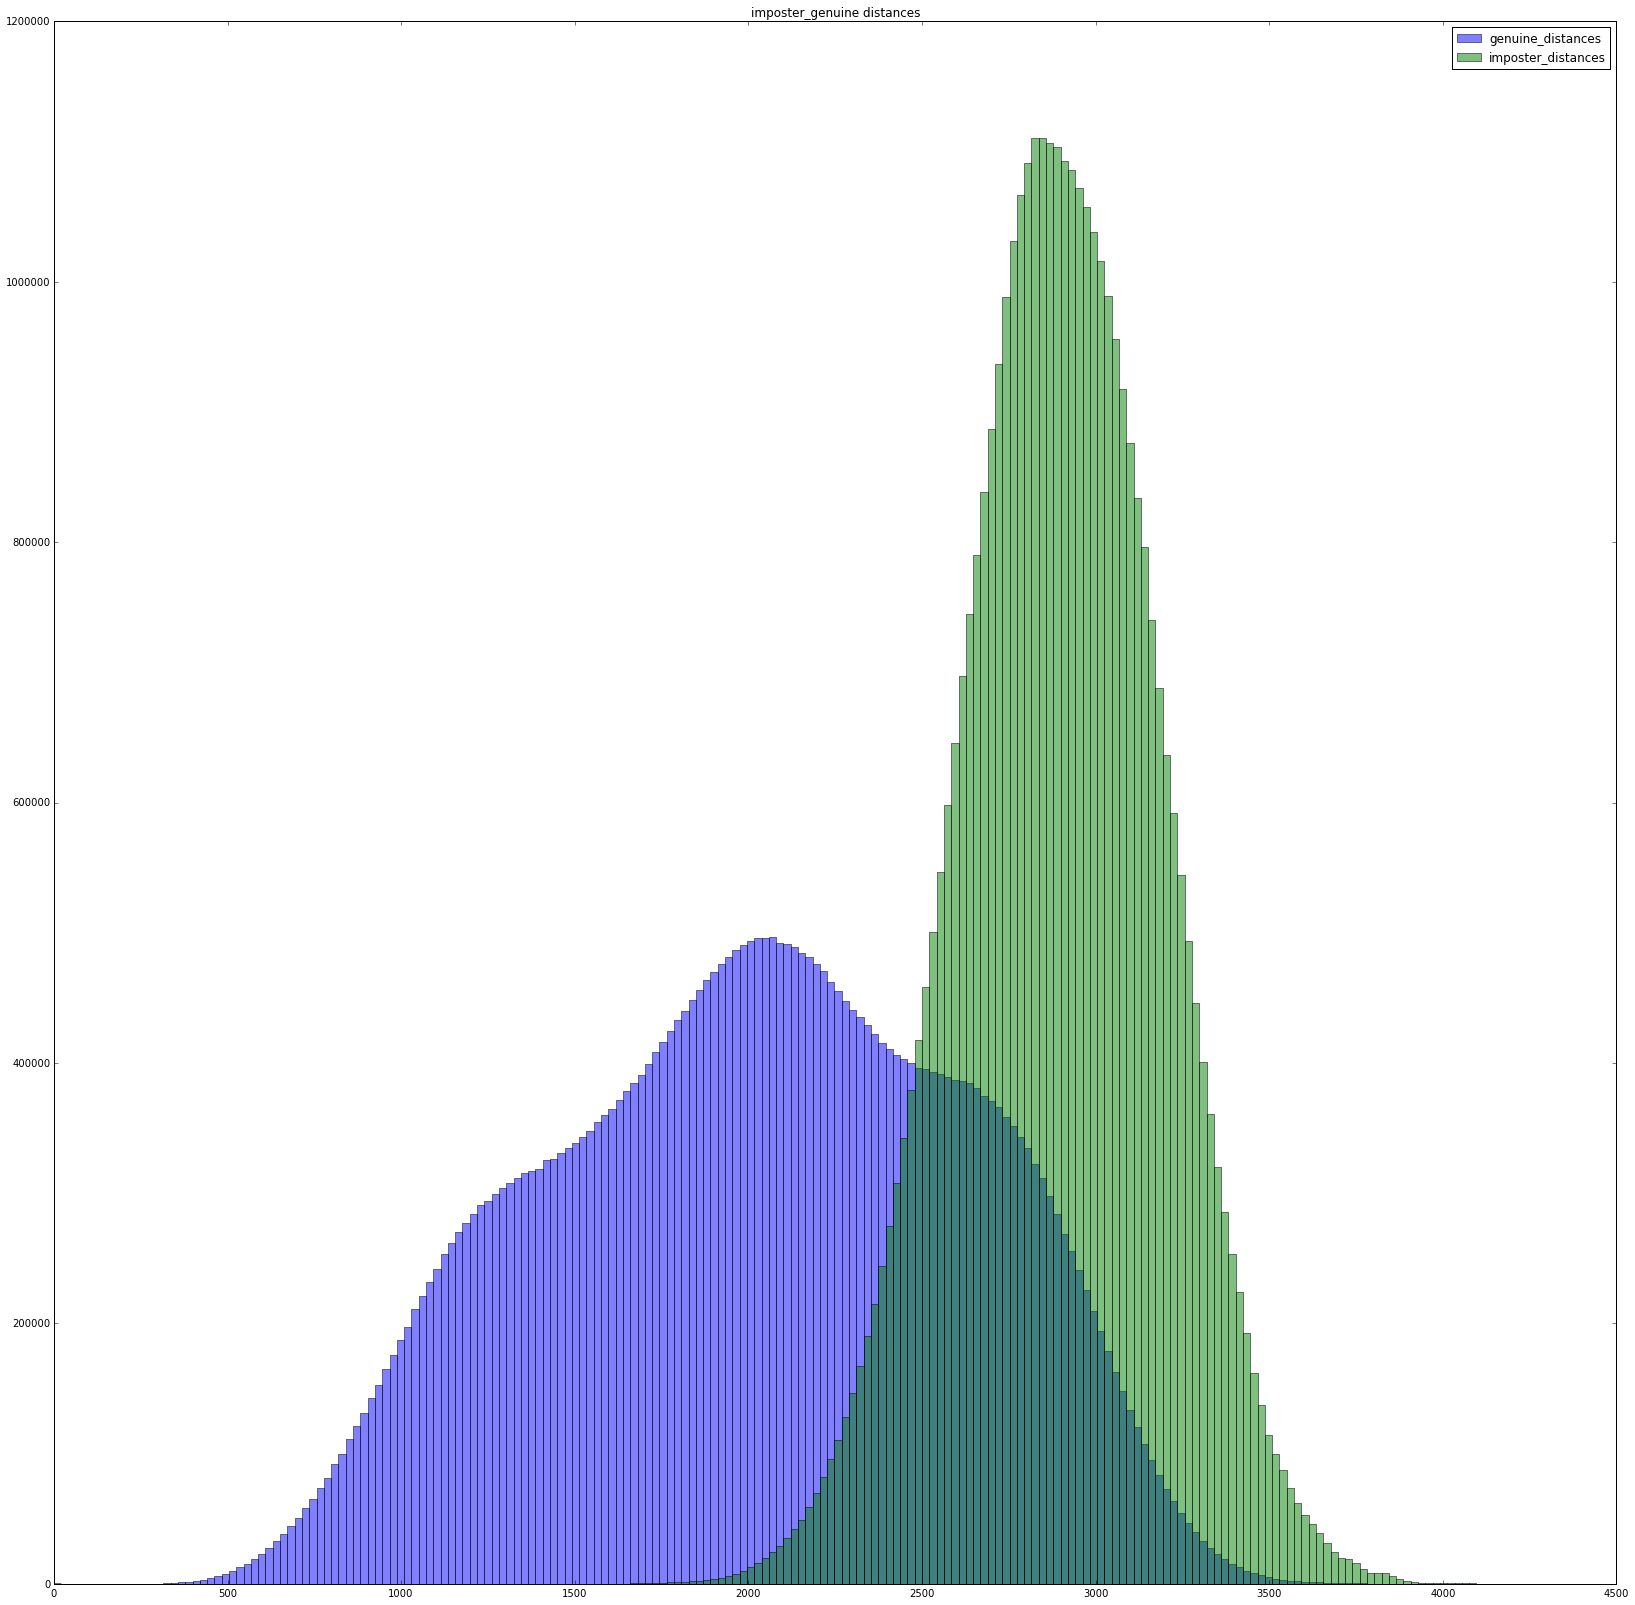

In [109]:
plt.hist(genuine,range=[0,m],alpha=0.5,label='genuine_distances',bins=200)
plt.hist(imposter,range=[0,m],alpha=0.5,label='imposter_distances',bins=200)
plt.legend()
plt.title("imposter_genuine distances")
plt.show()
plt.savefig("imposter_genuine distances")
plt.close()

In [ ]:
TPR = []
FPR = []
def ROC(i,g):
    treshold = 100
    while(treshold <=m):
        TP=FP=FN=TN=0
        EER = 0
        for each in g:
            if(each < treshold):
                TP+=1;
            else:
                FN+=1
        for each in i:
            if(each < treshold):
                FP+=1
            else:
                TN+=1
        if(FP == FN):
            EER = treshhold
        treshold+=100;
    return EER
ROC(imposter,genuine)

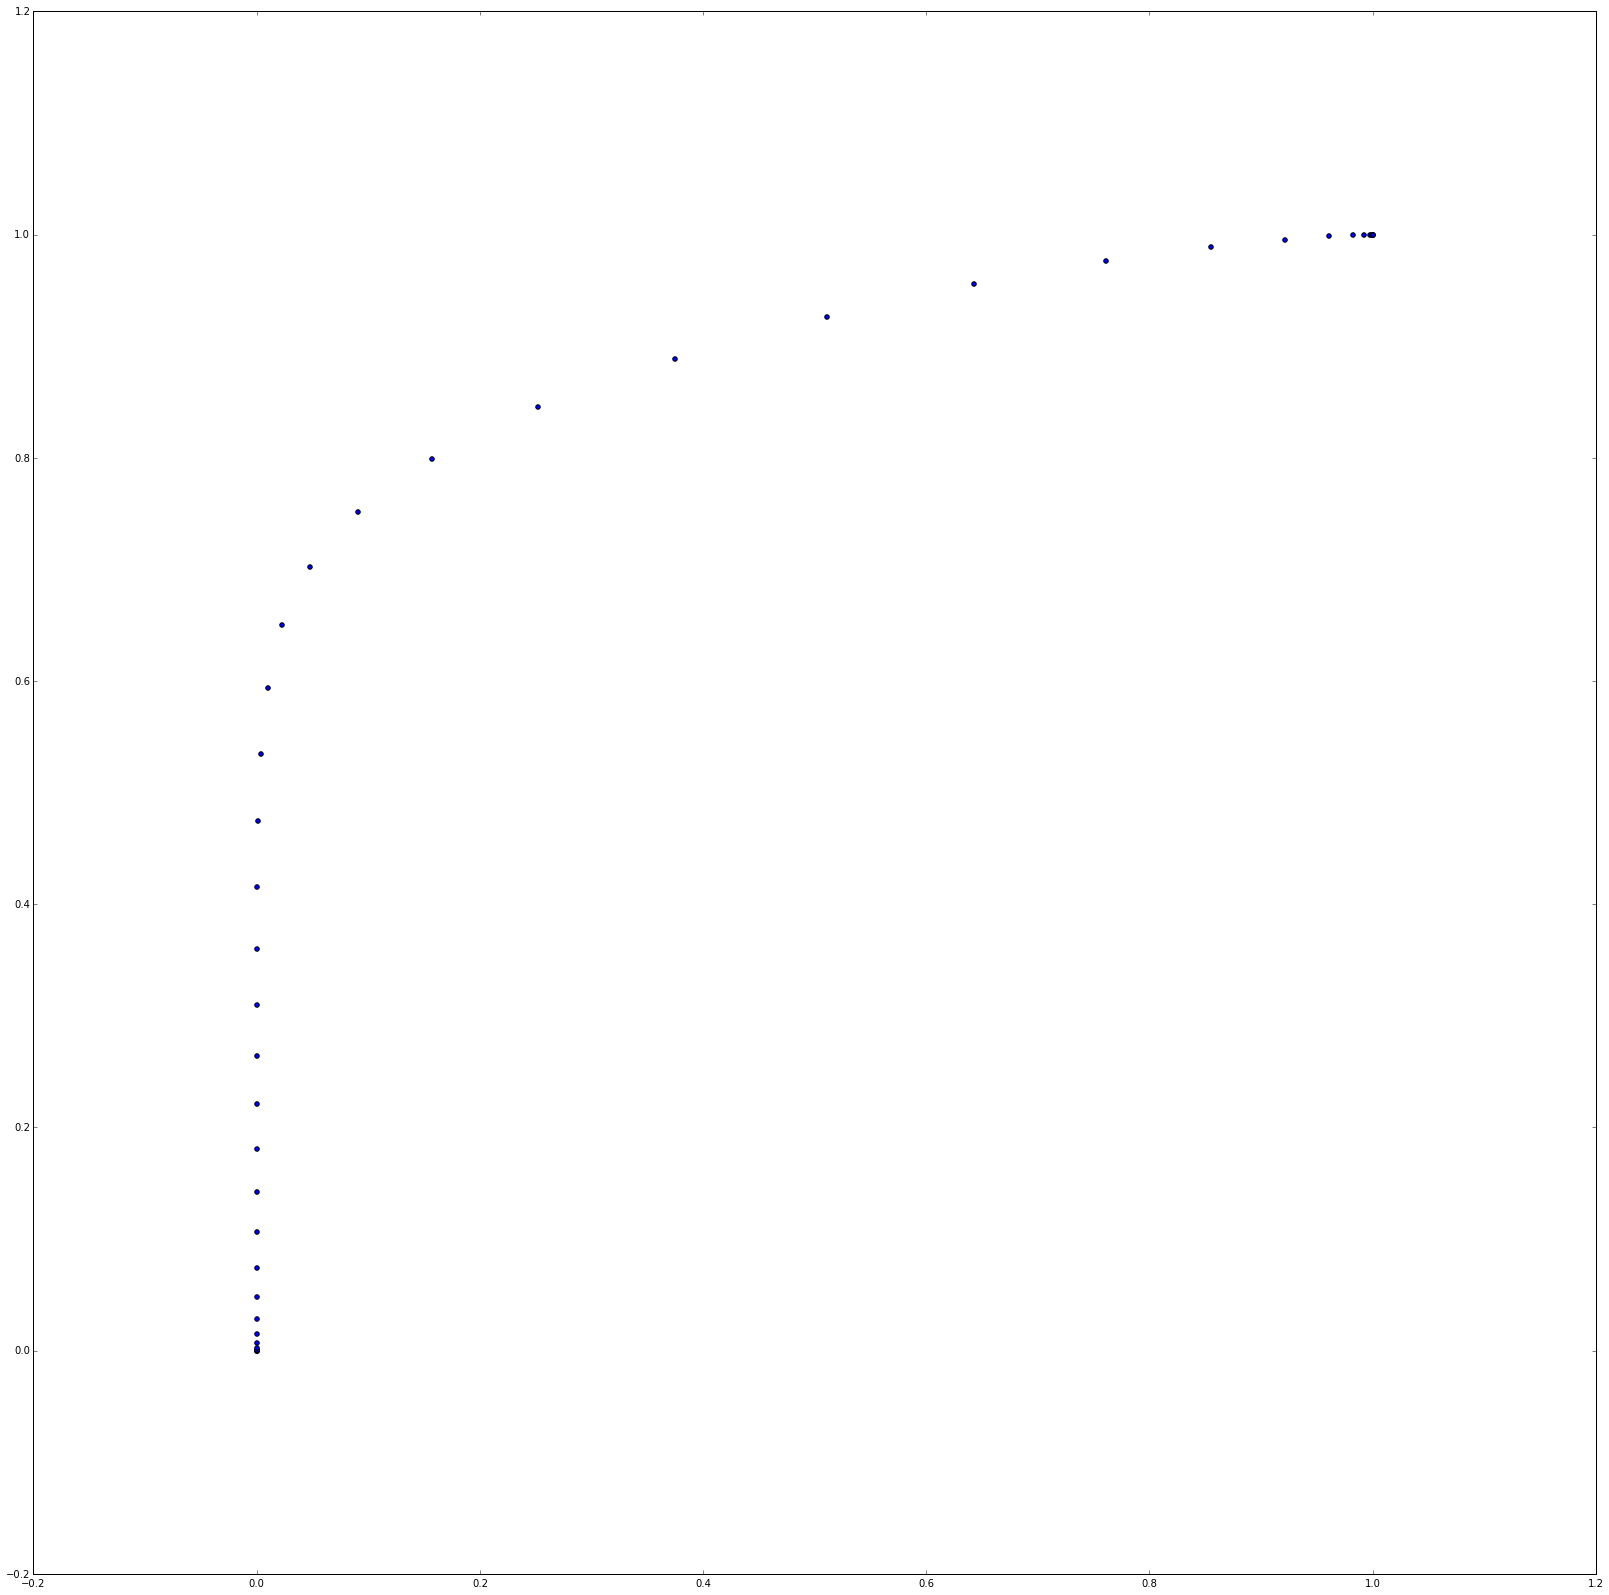

In [132]:
plt.scatter(FPR,TPR)

In [ ]:
from scipy.spatial.distance import cdist
def findminK(k,a):
    a_sorted = np.argsort(a,axis=0)
#    print(a_sorted)
    k_min = a_sorted[0:k].flatten(                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           )
#    print(k_min)
    return k_min
#findminK(3,[1,2,5,4,9,0])
def voting(k_nbs,l):
    k_l = []
#    print(k_nbs[1])
    for i in range(0,len(k_nbs)):
        t=l[k_nbs[i]]        
        k_l.append(t)
    return max(set(k_l), key=k_l.count)
#voting(np.arange(0,9))  
#print(label[0:9])
def KNN(k_train,k_labels,k_test,k):
    results = []
    count_control = 100
    ds = cdist(k_test,k_train,'euclidean')
    for each in ds:
        k_nbs = findminK(k,each)
        results.append(voting(k_nbs,k_labels))
    return results
#    for i in range(0,k_test.shape[0]):
#        distances = []
#        for j in range(0,k_train.shape[0]):
#            distances.extend(ds)
#            print(distances)
#        k_nbs=findminK(k,distances)
#        print(k_nbs)
#        results.append(voting(k_nbs,k_labels))
#        print(results)
#        if(i == count_control): 
#            print(i)
#            count_control += 100
#    print("done")
#KNN(train[:300],label[:300],test[:100],5)

In [ ]:
data = np.genfromtxt("Desktop/MordernAnalytics/assignment1/test.csv",delimiter=",")[1:]
test = np.asarray(data)

In [45]:
#predict_label = KNN(train,label,test[0:1000],5)

(28000,)


In [14]:
import csv
with open("image_output.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerow(['ImageId','Label'])
    for i in range(0,len(predict_label)):
        writer.writerow([i,predict_label[i]])

In [ ]:
def Accuracy(predict,actual):
    T = F =0
    for i in range(0,len(predict)):
        if(predict[i] == actual[i]):
            T+=1
        else:
            F+=1
    accuracy = T/(T+F)
    return accuracy
def ConfusionMatrix(predict,actual):
    cm = np.zeros([10,10])
    predict = map(int,predict)
    actual = map(int,actual)
    for i in range(0,len(actual)):
        cm[actual[i]][predict[i]]+=1
    return cm
#ConfusionMatrix([0.0,1.0,2.0],[2.0,1.0,0.0])

In [ ]:
def CrossValidation(n_train,train_label):
    start = 0
    end = len(n_train)//3
    acc = 0
    ave_cm = np.zeros([10,10])
    for i in range(0,3):
        ts = n_train[start:end]
        ts_label = train_label[start:end]
        tn = np.delete(n_train,np.arange(start,end),axis=0)
        tn_label = np.delete(train_label,np.arange(start,end),axis=0)
#        print(ts.shape)
        p = KNN(tn,tn_label,ts,5)
        acc+=Accuracy(p,ts_label)
        start = end
        end+=end
        ave_cm+=ConfusionMatrix(p,ts_label)
    plt.matshow(ave_cm//3)
    plt.colorbar()
    return acc/3    
CrossValidation(train[:600],label[:600])
#Accuracy(KNN(train[300:1000],label[300:1000],train[0:300],9),label[0:300])
